In [1]:
#część 1. Lista dostępnych walut

import requests
import json

r=requests.get('http://api.nbp.pl/api/exchangerates/tables/c/?format=json') 
listajson = r.json()
slownik = listajson[0]
waluty = slownik['rates'] 


def wylistuj_dostepne_waluty():
    kody_walut=[]
    for waluta in waluty:
        kod_waluty = waluta['code']
        kody_walut.append(kod_waluty)
    return kody_walut
  

wylistuj_dostepne_waluty()  

['USD',
 'AUD',
 'CAD',
 'EUR',
 'HUF',
 'CHF',
 'GBP',
 'JPY',
 'CZK',
 'DKK',
 'NOK',
 'SEK',
 'XDR']

In [2]:
#część 2. Funkcje zakupu i sprzedaży walut

from IPython.display import clear_output

def kup_walute(waluta, kwota): 
    for kod_wal in waluty:
        if kod_wal['code']==waluta:
            ask = kod_wal['ask'] 
            wynik = round(ask * pole_wartosc.value,2) 
            print(wynik)  
            return wynik
        clear_output(wait=True)                  
                    
                    
def sprzedaj_walute(waluta, kwota):
    for kod_wal in waluty:
        if kod_wal['code']==waluta:
            bid = kod_wal['bid']
            wynik = round(bid *pole_wartosc.value,2)
            print(wynik)  
            return wynik
        clear_output(wait=True) 
                    
                    
                    
#guziki i pola do wpisywania/wybierania wartości

import ipywidgets as wg
from IPython.display import display


kupno_sprzedaz_btn = wg.Dropdown(options={'Kupno': 1, 'Sprzedaż': 2}, value=2, description='Kupno/Sprzedaż:') 
display(kupno_sprzedaz_btn)

wybor_waluty = wg.Dropdown(options=wylistuj_dostepne_waluty(),
    description='Waluta:',
)

display(wybor_waluty)

pole_wartosc = wg.FloatText(value = 0, description='Kwota')
display(pole_wartosc)

oblicz_btn = wg.Button(description="Oblicz", button_style='success', icon='calculator') 
display(oblicz_btn)

def wykonaj_na_klik(x): 
    lista = str(pole_wartosc.value).split('.') 
    if len(lista[1])<=2:
        
        if kupno_sprzedaz_btn.value == 2:     
            sprzedaj_walute(wybor_waluty.value,pole_wartosc.value)       

        else:     
            kup_walute(wybor_waluty.value, pole_wartosc.value)
    else:
        print("Podano złą kwotę. Kwota powinna zawierać maksymalnie dwa miejsca po przecinku")
    clear_output(wait=True) 


oblicz_btn.on_click(wykonaj_na_klik)


0.7


2017-08-24 HUF 0.014028 0.014312
2017-08-25 HUF 0.013882 0.014162
2017-08-28 HUF 0.01381 0.014088
2017-08-29 HUF 0.013837 0.014117
2017-08-30 HUF 0.013837 0.014117
2017-08-31 HUF 0.013786 0.014064
2017-09-01 HUF 0.013776 0.014054
2017-09-04 HUF 0.013779 0.014057
2017-09-05 HUF 0.013714 0.013992
2017-09-06 HUF 0.013707 0.013983


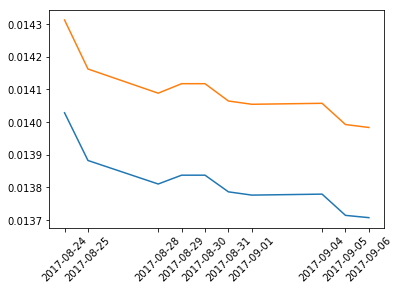

In [3]:
#część 3 dodatkowa funkcjonalność - historia kursów z ostatnich 10 dni.
import datetime as dt
sprawdz_btn = wg.Button(description="Sprawdź", button_style='info', icon='fa-line-chart') 
display(sprawdz_btn)


def klik_sprawdz(x):  
   
    kursy_10dni=requests.get('http://api.nbp.pl/api/exchangerates/tables/c/last/10/?format=json')
    kursy_10dni_json = kursy_10dni.json()
    
    lista_dat=[]
    lista_kursow_bid=[]
    lista_kursow_ask=[]
    
    for i in kursy_10dni_json:

        data=i['effectiveDate']
        data2 = dt.datetime.strptime(data, '%Y-%m-%d')
        data_kursu=data2.date()
    
       
        for kod in i['rates']:
            if wybor_waluty.value==kod['code']:
                
                lista_dat.append(data_kursu)
                lista_kursow_bid.append(kod['bid'])
                lista_kursow_ask.append(kod['ask'])
                
                print(data_kursu, wybor_waluty.value, kod['bid'], kod['ask'])
    


                             
    import matplotlib.pyplot as plt
    import numpy as np  
    
    x=lista_dat
    y=lista_kursow_bid
    z=lista_kursow_ask
    
    plt.xticks(x, lista_dat, rotation=45)
    plt.plot(x,y)
    plt.plot(x,z)
    plt.show()
               
    
    clear_output(wait=True)         
            

sprawdz_btn.on_click(klik_sprawdz)   